In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('D:/Flip Robo/Project-Housing_splitted/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

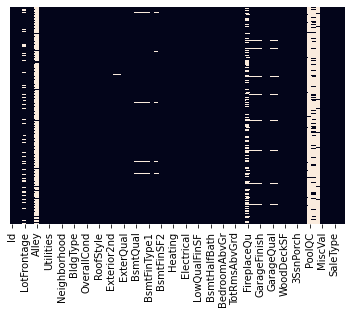

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [6]:
df.shape

(1168, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [8]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [9]:
df.drop(['Alley'],axis=1,inplace=True)

In [10]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtCond'].mode()[0])

In [11]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [12]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [13]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [14]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [15]:
df.shape

(1168, 76)

In [16]:
df.drop(['Id'],axis=1,inplace=True)

In [17]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

In [19]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

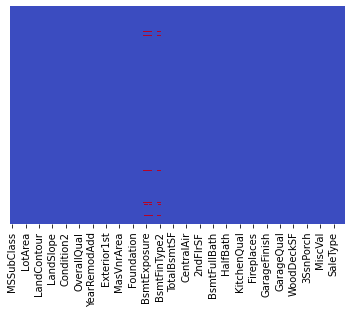

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [21]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

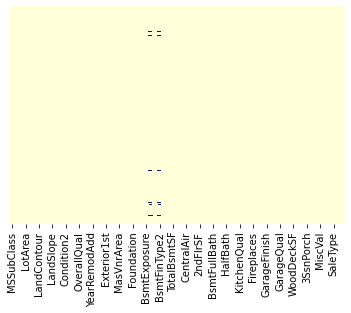

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [23]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [24]:
df.dropna(inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1138 entries, 0 to 1167
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1138 non-null   int64  
 1   MSZoning       1138 non-null   object 
 2   LotFrontage    1138 non-null   float64
 3   LotArea        1138 non-null   int64  
 4   Street         1138 non-null   object 
 5   LotShape       1138 non-null   object 
 6   LandContour    1138 non-null   object 
 7   Utilities      1138 non-null   object 
 8   LotConfig      1138 non-null   object 
 9   LandSlope      1138 non-null   object 
 10  Neighborhood   1138 non-null   object 
 11  Condition1     1138 non-null   object 
 12  Condition2     1138 non-null   object 
 13  BldgType       1138 non-null   object 
 14  HouseStyle     1138 non-null   object 
 15  OverallQual    1138 non-null   int64  
 16  OverallCond    1138 non-null   int64  
 17  YearBuilt      1138 non-null   int64  
 18  YearRemo

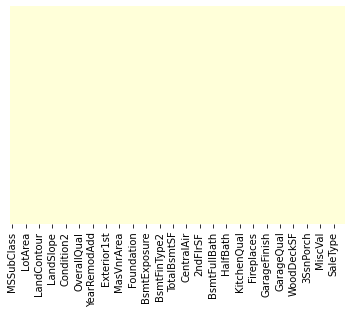

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [27]:
df.shape

(1138, 75)

In [28]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,70.98847,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,20,RL,95.00000,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,...,0,0,224,0,0,10,2007,WD,Normal,268000
2,60,RL,92.00000,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,20,RL,105.00000,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,COD,Normal,190000
4,20,RL,70.98847,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,6,2009,WD,Normal,215000


In [30]:
ts_df=pd.read_csv('D:/Flip Robo/Project-Housing_splitted/test.csv')

In [31]:
ts_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [32]:
ts_df.shape

(292, 80)

In [33]:
ts_df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [34]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [35]:
ts_df['BsmtCond']=ts_df['BsmtCond'].fillna(ts_df['BsmtCond'].mode()[0])
ts_df['BsmtQual']=ts_df['BsmtQual'].fillna(ts_df['BsmtCond'].mode()[0])

In [36]:
ts_df['FireplaceQu']=ts_df['FireplaceQu'].fillna(ts_df['FireplaceQu'].mode()[0])
ts_df['GarageType']=ts_df['GarageType'].fillna(ts_df['GarageType'].mode()[0])

In [37]:
ts_df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [38]:
ts_df.shape

(292, 79)

In [39]:
ts_df['GarageFinish']=ts_df['GarageFinish'].fillna(ts_df['GarageFinish'].mode()[0])
ts_df['GarageQual']=ts_df['GarageQual'].fillna(ts_df['GarageQual'].mode()[0])
ts_df['GarageCond']=ts_df['GarageCond'].fillna(ts_df['GarageCond'].mode()[0])

In [40]:
ts_df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [41]:
ts_df.shape

(292, 76)

In [42]:
ts_df.drop(['Id'],axis=1,inplace=True)

In [43]:
ts_df['MasVnrType']=ts_df['MasVnrType'].fillna(ts_df['MasVnrType'].mode()[0])
ts_df['MasVnrArea']=ts_df['MasVnrArea'].fillna(ts_df['MasVnrArea'].mode()[0])

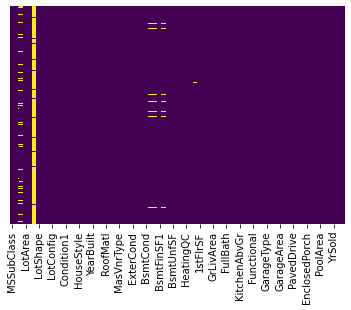

In [44]:
sns.heatmap(ts_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [45]:
ts_df['BsmtExposure']=ts_df['BsmtExposure'].fillna(ts_df['BsmtExposure'].mode()[0])

In [46]:
ts_df['BsmtFinType2']=ts_df['BsmtFinType2'].fillna(ts_df['BsmtFinType2'].mode()[0])

In [47]:
ts_df.loc[:,ts_df.isnull().any()].head()

,LotFrontage,Alley,BsmtFinType1,Electrical
0,86.0,NaN,GLQ,SBrkr
1,NaN,NaN,GLQ,SBrkr
2,NaN,NaN,Unf,SBrkr
3,75.0,NaN,Rec,SBrkr
4,86.0,NaN,Unf,SBrkr


In [48]:
ts_df['LotFrontage']=ts_df['LotFrontage'].fillna(ts_df['LotFrontage'].mode()[0])
ts_df['Alley']=ts_df['Alley'].fillna(ts_df['Alley'].mode()[0])
ts_df['BsmtFinType1']=ts_df['BsmtFinType1'].fillna(ts_df['BsmtFinType1'].mode()[0])
ts_df['Electrical']=ts_df['Electrical'].fillna(ts_df['Electrical'].mode()[0])

In [49]:
ts_df.shape

(292, 75)

In [50]:
ts_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

In [51]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   Alley          292 non-null    object 
 6   LotShape       292 non-null    object 
 7   LandContour    292 non-null    object 
 8   Utilities      292 non-null    object 
 9   LotConfig      292 non-null    object 
 10  LandSlope      292 non-null    object 
 11  Neighborhood   292 non-null    object 
 12  Condition1     292 non-null    object 
 13  Condition2     292 non-null    object 
 14  BldgType       292 non-null    object 
 15  HouseStyle     292 non-null    object 
 16  OverallQual    292 non-null    int64  
 17  OverallCond    292 non-null    int64  
 18  YearBuilt 

In [52]:
final_df=pd.concat([df,ts_df],axis=0)

In [53]:
final_df.shape

(1430, 76)

In [54]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 291
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1430 non-null   int64  
 1   MSZoning       1430 non-null   object 
 2   LotFrontage    1430 non-null   float64
 3   LotArea        1430 non-null   int64  
 4   Street         1430 non-null   object 
 5   LotShape       1430 non-null   object 
 6   LandContour    1430 non-null   object 
 7   Utilities      1430 non-null   object 
 8   LotConfig      1430 non-null   object 
 9   LandSlope      1430 non-null   object 
 10  Neighborhood   1430 non-null   object 
 11  Condition1     1430 non-null   object 
 12  Condition2     1430 non-null   object 
 13  BldgType       1430 non-null   object 
 14  HouseStyle     1430 non-null   object 
 15  OverallQual    1430 non-null   int64  
 16  OverallCond    1430 non-null   int64  
 17  YearBuilt      1430 non-null   int64  
 18  YearRemod

In [55]:
final_df['Alley']=final_df['Alley'].fillna(final_df['Alley'].mode()[0])
final_df['SalePrice']=final_df['SalePrice'].fillna(final_df['SalePrice'].mode()[0])

In [56]:
final_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Alley            0
Length: 76, dtype: int64

In [57]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 291
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1430 non-null   int64  
 1   MSZoning       1430 non-null   object 
 2   LotFrontage    1430 non-null   float64
 3   LotArea        1430 non-null   int64  
 4   Street         1430 non-null   object 
 5   LotShape       1430 non-null   object 
 6   LandContour    1430 non-null   object 
 7   Utilities      1430 non-null   object 
 8   LotConfig      1430 non-null   object 
 9   LandSlope      1430 non-null   object 
 10  Neighborhood   1430 non-null   object 
 11  Condition1     1430 non-null   object 
 12  Condition2     1430 non-null   object 
 13  BldgType       1430 non-null   object 
 14  HouseStyle     1430 non-null   object 
 15  OverallQual    1430 non-null   int64  
 16  OverallCond    1430 non-null   int64  
 17  YearBuilt      1430 non-null   int64  
 18  YearRemod

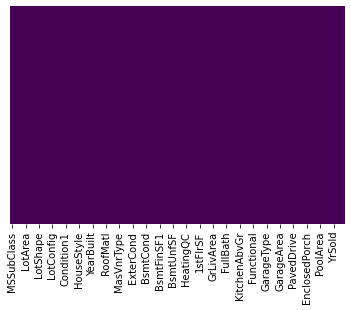

In [58]:
sns.heatmap(ts_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [59]:
final_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,...,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000
mean,56.849650,69.962659,10546.103497,6.137063,5.584615,1971.561538,1985.180420,104.348252,452.946853,47.525874,...,95.600699,47.346154,21.881818,3.355245,15.376923,2.816783,43.212587,6.330769,2007.812587,174551.201399
std,42.335448,22.277564,10072.844796,1.364125,1.110816,30.347994,20.511538,181.601319,456.261010,162.861296,...,125.969642,66.570680,61.034957,29.248741,56.296487,40.594842,500.186415,2.712043,1.326843,72675.638918
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7585.750000,5.000000,5.000000,1954.000000,1967.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,139100.000000
50%,50.000000,70.988470,9501.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,397.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,145000.000000
75%,70.000000,79.000000,11635.500000,7.000000,6.000000,2001.000000,2004.000000,166.750000,723.000000,0.000000,...,168.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,198650.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [60]:
final_df_cor=final_df.corr()
final_df_cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.360232,-0.140565,0.033292,-0.060509,0.029216,0.040977,0.021893,-0.070100,-0.066009,...,-0.014929,-0.007797,-0.018566,-0.040930,-0.025993,0.008441,-0.006761,-0.018528,-0.023661,-0.055492
LotFrontage,-0.360232,1.000000,0.304041,0.232007,-0.055153,0.111660,0.078596,0.173808,0.211807,0.042255,...,0.071860,0.134229,0.015508,0.066694,0.036050,0.181493,0.002521,0.009912,0.004790,0.308981
LotArea,-0.140565,0.304041,1.000000,0.103923,-0.006556,0.013329,0.009972,0.103222,0.213646,0.110558,...,0.170713,0.082978,-0.018126,0.021000,0.042453,0.077572,0.038293,-0.000948,-0.014990,0.192364
OverallQual,0.033292,0.232007,0.103923,1.000000,-0.112492,0.571617,0.545236,0.406859,0.220504,-0.068696,...,0.231064,0.303850,-0.120643,0.031805,0.058958,0.064839,-0.032208,0.063966,-0.027554,0.686421
OverallCond,-0.060509,-0.055153,-0.006556,-0.112492,1.000000,-0.384373,0.061985,-0.128985,-0.055562,0.038320,...,-0.007778,-0.040355,0.073075,0.023542,0.053243,-0.002589,0.067262,-0.009181,0.047326,-0.060011
YearBuilt,0.029216,0.111660,0.013329,0.571617,-0.384373,1.000000,0.597115,0.308537,0.243818,-0.052252,...,0.224403,0.189076,-0.390915,0.032848,-0.053331,0.004306,-0.034713,0.009339,-0.015163,0.437634
YearRemodAdd,0.040977,0.078596,0.009972,0.545236,0.061985,0.597115,1.000000,0.172031,0.116716,-0.073453,...,0.200791,0.222423,-0.201748,0.040449,-0.043623,0.004864,-0.009085,0.015066,0.027805,0.437679
MasVnrArea,0.021893,0.173808,0.103222,0.406859,-0.128985,0.308537,0.172031,1.000000,0.258633,-0.073772,...,0.159057,0.121589,-0.114889,0.018841,0.060791,0.011525,-0.028979,-0.010656,-0.006281,0.398156
BsmtFinSF1,-0.070100,0.211807,0.213646,0.220504,-0.055562,0.243818,0.116716,0.258633,1.000000,-0.056624,...,0.196781,0.103292,-0.103381,0.028905,0.057118,0.140498,0.004165,-0.019244,0.017039,0.309478
BsmtFinSF2,-0.066009,0.042255,0.110558,-0.068696,0.038320,-0.052252,-0.073453,-0.073772,-0.056624,1.000000,...,0.065180,0.000104,0.037354,-0.029862,0.087378,0.041331,0.005117,-0.016288,0.032792,-0.014282


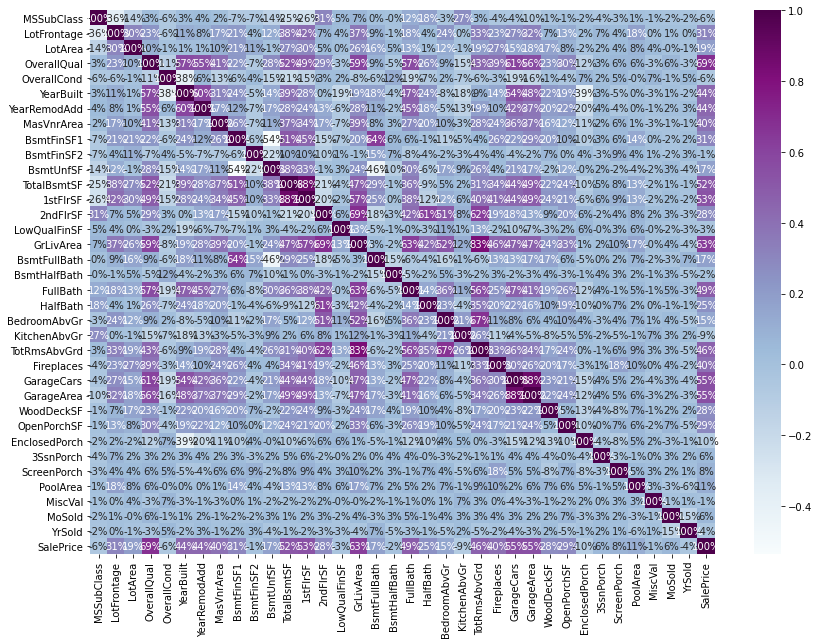

In [61]:
plt.figure(figsize=(14,10))
sns.heatmap(final_df_cor,annot=True,fmt='.0%',cmap='BuPu')
plt.show()

In [62]:
final_df.skew()

MSSubClass        1.417113
LotFrontage       2.362078
LotArea          12.118192
OverallQual       0.249815
OverallCond       0.712599
YearBuilt        -0.633788
YearRemodAdd     -0.528309
MasVnrArea        2.667586
BsmtFinSF1        1.677131
BsmtFinSF2        4.204950
BsmtUnfSF         0.924115
TotalBsmtSF       2.019789
1stFlrSF          1.400462
2ndFlrSF          0.792842
LowQualFinSF      8.925172
GrLivArea         1.381720
BsmtFullBath      0.562597
BsmtHalfBath      4.053797
FullBath          0.035970
HalfBath          0.642706
BedroomAbvGr      0.183192
KitchenAbvGr      5.036988
TotRmsAbvGrd      0.689976
Fireplaces        0.635899
GarageCars       -0.327055
GarageArea        0.196674
WoodDeckSF        1.523901
OpenPorchSF       2.351872
EnclosedPorch     3.112344
3SsnPorch        10.446550
ScreenPorch       4.072663
PoolArea         14.673456
MiscVal          24.379714
MoSold            0.211190
YrSold            0.103762
SalePrice         2.337511
dtype: float64

In [63]:
final_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

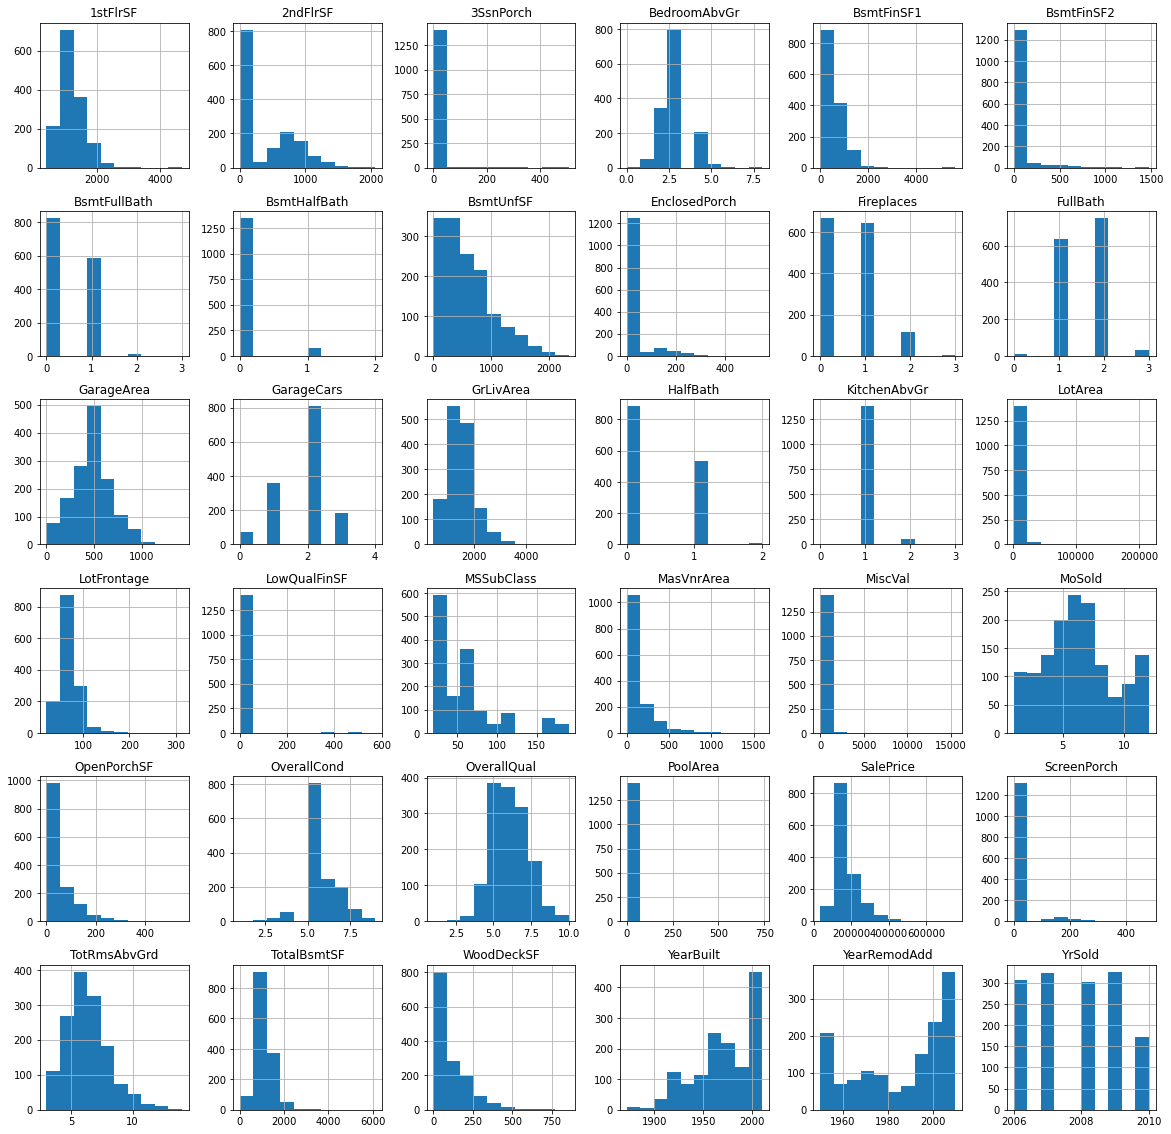

In [64]:
final_df.hist(figsize=(20,20))
plt.show()

In [65]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in final_df.columns:
    if final_df[column].dtype==np.number:
        continue
    final_df[column]=le.fit_transform(final_df[column])

In [66]:
from scipy.stats import skew
skew(final_df['SalePrice'].dropna())

2.335058810612211

In [67]:
from scipy import stats
p_value=stats.shapiro(final_df['SalePrice'].dropna())[1]
if p_value >= 0.05:
    print('null hyp of normality is rejected')
else:
    print('null hyp of normality is accepted')


null hyp of normality is accepted


In [68]:
x=final_df.iloc[:,0:-1]
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,11,3,70.98847,94,1,0,3,0,4,0,...,0,0,0,0,0,1,1,8,4,128000.0
1,0,3,95.00000,960,1,0,3,0,4,1,...,0,0,52,0,0,9,1,8,4,268000.0
2,5,3,92.00000,525,1,0,3,0,1,0,...,0,0,0,0,0,5,1,8,4,269790.0
3,0,3,105.00000,741,1,0,3,0,4,0,...,0,0,0,0,0,0,4,0,4,190000.0
4,0,3,70.98847,977,1,0,3,0,2,0,...,0,0,0,0,0,5,3,8,4,215000.0


In [69]:
y=final_df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Alley, dtype: int32

In [70]:
x.shape

(1430, 75)

In [71]:
y.shape

(1430,)

In [72]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [73]:
x_train.shape

(958, 75)

In [74]:
y_train.shape

(958,)

In [75]:
x_test.shape

(472, 75)

In [76]:
y_test.shape

(472,)

In [77]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [78]:
lr.fit(x_train,y_train)

LinearRegression()

In [79]:
lr.coef_

array([-2.23977335e-03, -2.07672485e-03, -2.42398616e-05, -4.01491902e-06,
       -5.49681683e-03,  7.41963846e-04, -4.28876149e-05, -3.44720671e-13,
       -1.13668675e-03,  4.20235476e-03,  4.31769023e-04,  8.52443332e-04,
        1.95289334e-03,  7.75461652e-03,  3.12500415e-03,  3.65105637e-03,
       -3.29138268e-03, -3.45544501e-04,  1.45286259e-04,  1.37619639e-04,
       -1.61264547e-03,  8.84130651e-05,  3.24622211e-04,  3.83790392e-03,
        8.85790869e-06,  2.29998315e-03, -1.90223965e-03,  2.43755605e-04,
        1.03694540e-03, -4.38068640e-03, -4.30682549e-03, -2.18933208e-04,
        1.57750271e-05, -8.78386795e-04, -1.14143694e-06,  1.40186229e-05,
       -2.43201062e-05,  6.73555306e-02, -6.35270586e-04,  1.58535922e-02,
        2.40879355e-04, -1.14292860e-05, -1.51697133e-05,  1.96815041e-03,
        2.49677006e-05, -2.13216588e-03, -5.14680026e-03,  3.50366572e-03,
       -6.76348853e-04,  3.16830469e-03,  5.76463961e-03,  2.24921890e-03,
       -2.61478357e-03,  

In [80]:
lr.intercept_

-0.03346412168733773

In [81]:
lr.score(x_train,y_train)

0.16513260341827907

In [82]:
final_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [83]:
label=lr.predict(x_test)
print('Predicted SaleaPrice:',label)
print('actual SalePrice',y_test)

Predicted SaleaPrice: [-5.46651911e-03 -2.12722436e-02 -1.16071172e-02 -3.42628656e-02
 -7.46518772e-03 -2.45317170e-04 -1.68083722e-02 -5.42592979e-03
  2.93495607e-03 -2.29557528e-03 -2.12871032e-03  4.61567992e-03
 -2.91664871e-03 -4.73371647e-03  1.87609797e-03 -5.62730724e-03
  6.35712963e-03 -2.18763472e-02  1.13724232e-02  8.75813226e-03
  2.19380834e-02  1.17210902e-02 -6.98739406e-03  5.38476241e-03
 -6.42459172e-03  7.41330517e-03 -1.51218274e-02  1.78869375e-02
  4.36958988e-03  1.90649472e-02 -2.73775751e-04  4.97280053e-03
 -2.75491160e-03  2.25340396e-02  3.29267409e-03 -3.42641388e-03
  9.43810911e-04  2.10022789e-02 -1.60443173e-02  1.88669982e-02
 -1.26930362e-03 -1.51805738e-02  4.55502169e-02  2.73147543e-02
  9.38543882e-02 -2.70944029e-02  1.27747679e-02 -6.40537715e-03
 -2.15183786e-02  3.38081422e-03 -7.30377589e-03  7.93045879e-02
 -6.28601918e-03 -1.47859060e-02 -8.01897593e-03  8.40064016e-02
 -6.91249649e-03 -5.64907783e-03  1.13565877e-02  2.14723766e-02
  6

In [84]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,label))
print('Mean squared error:',mean_squared_error(y_test,label))


error:
Mean absolute error: 0.016960948281216116
Mean squared error: 0.006549725143427543


In [85]:
from sklearn.metrics import r2_score
print(r2_score(y_test,label))

-0.03708171027246743


In [86]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean()

-0.003558718861209975

In [87]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor

In [88]:
model=[LinearRegression(),DecisionTreeRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('r2_score:',r2_score(y_test,predm))
    print('***************************************************************')
    print('\n')

Score of LinearRegression() is: 0.16513260341827907
Error:
Mean absolute error: 0.016960948281216116
Mean squared error: 0.006549725143427543
r2_score: -0.03708171027246743
***************************************************************


Score of DecisionTreeRegressor() is: 1.0
Error:
Mean absolute error: 0.006355932203389831
Mean squared error: 0.006355932203389831
r2_score: -0.006396588486140775
***************************************************************




In [89]:
model=[Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('r2_score:',r2_score(y_test,predm))
    print('***************************************************************')
    print('\n')

Score of Ridge() is: 0.1650487994218205
Error:
Mean absolute error: 0.016860418773477225
Mean squared error: 0.0065416629515391905
r2_score: -0.03580514498628773
***************************************************************


Score of ElasticNet() is: 0.0023252266157295365
Error:
Mean absolute error: 0.008529816447110075
Mean squared error: 0.006327933501816156
r2_score: -0.0019632816408035048
***************************************************************




In [90]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,random_state=59)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predrf)) 
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('\n')
print('r2_score:',r2_score(y_test,predrf))

Score: 0.7983289748953976


Mean absolute error: 0.007415254237288135
Mean squared error: 0.006483050847457626


r2_score: -0.026524520255863493


In [91]:
from sklearn.linear_model import Lasso
model=[Lasso()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('r2_score:',r2_score(y_test,predm))
    print('***************************************************************')
    print('\n')

Score of Lasso() is: 0.00048101699890901184
Error:
Mean absolute error: 0.008514364593090969
Mean squared error: 0.006328758737918617
r2_score: -0.002093949302389042
***************************************************************




In [92]:
from sklearn.ensemble import AdaBoostRegressor
lasso=Lasso()

adb=AdaBoostRegressor(base_estimator=lasso,n_estimators=20,learning_rate=0.1,random_state=59)
adb.fit(x_train,y_train)
print('Score:',adb.score(x_train,y_train))
predadb=adb.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predadb)) 
print('Mean squared error:',mean_squared_error(y_test,predadb))
print('\n')
print('r2_score:',r2_score(y_test,predadb))

Score: -0.448684493856329


Mean absolute error: 0.03385771172371405
Mean squared error: 0.007284597301565561


r2_score: -0.15344116931910579


In [93]:
import joblib
joblib.dump(rf,'final_df.csv')

['final_df.csv']